# Otimização e Ajuste de Curvas
## Andre Nepomuceno - UFF

**1. Minimização sem vínculo**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize, minimize_scalar, leastsq, curve_fit

Função de Himmelblau 
\begin{equation}
  f(x,y) \,=\, (x^2 +y - 11)^2  + (x + y^2 -7)^2  \nonumber
\end{equation}

In [2]:
#implementa função de Himmelblau
def f(X):
    x,y = X
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

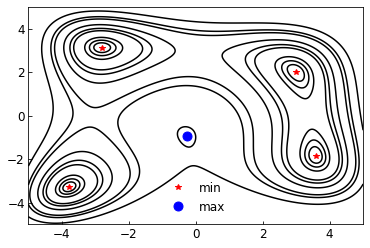

In [3]:
#Vamos fazer um gráfico de contorno da função
f2 = lambda x,y: (x**2 + y - 11)**2 + (x + y**2 - 7)**2
x = np.linspace(-5,5,500)
X,Y = np.meshgrid(x,x)
f1,ax = plt.subplots()
ax.contour(X,Y,f2(X,Y),[0,2,5,10,30,40,60,100,120,180],colors='k')
xmin = [-3.78,-2.80,3,3.58]
ymin= [-3.28,3.13,2,-1.85]
xmax = -0.2709
ymax = -0.923
ax.plot(xmin,ymin,marker='*',c='r',ls='',label='min')
ax.plot(xmax,ymax,marker='o',markersize=9,c='b',ls='',label='max')
ax.tick_params(direction='in',labelsize=12)
ax.legend(loc='lower center',frameon=False,fontsize=12)
#plt.savefig('../pcientifico_imagens/plot_23.png')

In [4]:
x0 = [0,0]
minimize(f,x0)

      fun: 1.3782261326630835e-13
 hess_inv: array([[ 0.01578229, -0.0094806 ],
       [-0.0094806 ,  0.03494937]])
      jac: array([-3.95019832e-06, -1.19075540e-06])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 10
     njev: 16
   status: 0
  success: True
        x: array([2.99999994, 1.99999999])

In [5]:
#vamos maximizar a função
mf = lambda X: -f(X)
minimize(mf,[0.1,-0.2])

      fun: -1.2100579056485772e+35
 hess_inv: array([[ 0.254751  , -0.43222419],
       [-0.43222419,  0.83976276]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 68
      nit: 2
     njev: 17
   status: 0
  success: True
        x: array([ 3.45579856e+08, -5.71590777e+08])

In [6]:
minimize(mf,[0.1,-0.2],method='Nelder-Mead')

 final_simplex: (array([[-0.27087419, -0.9230486 ],
       [-0.27089208, -0.92298798],
       [-0.27077447, -0.92304541]]), array([-181.6165215 , -181.61652146, -181.61652141]))
           fun: -181.61652150067573
       message: 'Optimization terminated successfully.'
          nfev: 77
           nit: 39
        status: 0
       success: True
             x: array([-0.27087419, -0.9230486 ])

In [7]:
#incluindo jacobiano e hessiano
def df(X):
    x, y = X
    f1 , f2 = x**2 + y - 11, x + y**2 - 7
    dfdx = 4*x*f1 + 2*f2
    dfdy = 2*f1 + 4*y*f2
    return np.array ([dfdx, dfdy ])
def ddf(X):
    x, y = X
    d2fdx2 = 12*x**2 + 4*y - 42
    d2fdy2 = 12*y**2 + 4*x - 26
    d2fdxdy = 4*(x + y)
    return np.array ([[d2fdx2, d2fdxdy ], [d2fdxdy , d2fdy2 ]])

In [8]:
mdf = lambda X: -df(X)
mddf = lambda X: - ddf(X)

In [9]:
minimize(mf, (0,0),jac=mdf,hess=mddf,method='dogleg')

     fun: -181.6165215225827
    hess: array([[44.81187272,  4.77553259],
       [ 4.77553259, 16.85937624]])
     jac: array([-1.26922473e-10,  1.23684885e-09])
 message: 'Optimization terminated successfully.'
    nfev: 5
    nhev: 4
     nit: 4
    njev: 5
  status: 0
 success: True
       x: array([-0.27084459, -0.92303856])

**2. Minimização com vínculo**

In [10]:
#regiao onde a funcao será minimizada: x < 0 e y <0
xlimites = (None,0)
ylimites = (None,0)
contorno = (xlimites,ylimites)
x0 = (-0.5,-0.5)

In [11]:
minimize(f,x0,bounds=contorno,method='slsqp')

     fun: 4.115667606325133e-08
     jac: array([-0.00283595, -0.00034243])
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([-3.77933774, -3.28319868])

In [12]:
#minimização com vínculo x = y
fvinc = lambda X: X[0] - X[1]
vinc = {'type': 'eq','fun': fvinc}

In [13]:
minimize(f,(0,0),constraints=vinc,method='slsqp')

     fun: 8.000000000716087
     jac: array([-16.33084416,  16.33130538])
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.54138438, 2.54138438])

In [14]:
#maximização com vínculo x = y
minimize(mf,(0,0),constraints=vinc,method='slsqp')

     fun: -3.182605330060369e+68
     jac: array([0., 0.])
 message: 'Singular matrix C in LSQ subproblem'
    nfev: 16
     nit: 4
    njev: 4
  status: 6
 success: False
       x: array([-1.12315113e+17, -1.12315113e+17])

In [15]:
##maximização com metodo cobyla
vinc1 = {'type':'ineq','fun':lambda X: X[0] - X[1]}
vinc2 = {'type':'ineq','fun':lambda X: X[1] - X[0]}

In [16]:
minimize(mf,(0,0),constraints=(vinc1,vinc2),method='cobyla')

     fun: -179.12499987327624
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 34
  status: 1
 success: True
       x: array([-0.49994148, -0.49994148])

**3. Otimização de Função de uma Variável**

In [17]:
#f(x) = x**4 - 3x**3 -24x**2 +28x +48
fp = np.polynomial.Polynomial( (48.,28.,-24.,-3,1))

Text(0, 0.5, '$f\\,(x)$')

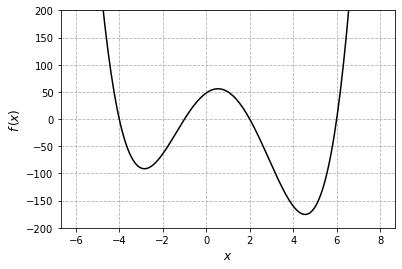

In [18]:
f1,ax = plt.subplots()
x = np.linspace(-6,8,200)
ax.plot(x,fp(x),c='k')
ax.set_ylim(-200,200)
ax.grid(ls='--')
ax.set_xlabel('$x$',fontsize=12)
ax.set_ylabel('$f\,(x)$',fontsize=12)

In [19]:
#sem intervalo inicial
minimize_scalar(fp)

     fun: -91.32163915433344
    nfev: 15
     nit: 10
 success: True
       x: -2.841044326595826

In [20]:
#com intervalo inicial (3,4,6)
minimize_scalar(fp,bracket=(3,4,6))

     fun: -175.45563549487974
    nfev: 14
     nit: 10
 success: True
       x: 4.549468364257193

**4. Ajuste de Curvas**

4.1 - Ajuste com leastsq

In [21]:
#Primeiro, definir a função a ser ajustada
#A primeira entrada DEVE ser a variável indedpendente
def f(t,A,omega,delta):
    return A*np.exp(-delta*t)*np.cos(omega*t)

(-10, 10)

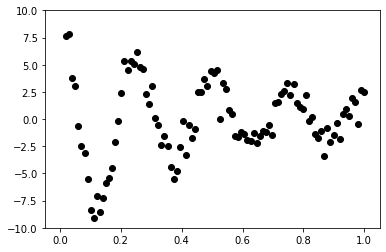

In [22]:
#Vamos simular os pontos experimentias
A, omega, delta = 10.,25., 2.
t = np.linspace(0,1,100)
yexato = f(t,A,omega,delta)
y = yexato + np.random.randn(len(yexato))
plt.plot(t,y,'ok')
plt.ylim(-10,10)

In [23]:
#Agora vamos fazer o ajuste. Aqui definimos a função residuo:
#residuo = y - f(xdata,params)
def residuo(p,y,t):
    A,omega,delta = p
    return y - f(t,A,omega,delta)
#    return y - f(t,p[0],p[1],p[2])

In [24]:
#Faça o ajuste
x0 = [5,5,1] #um ponto inicial para cada parâmetro
result1 = leastsq(residuo,x0,args=(y,t))
result1[0]

array([10.39386068, 24.98381639,  2.1663757 ])

In [25]:
p0,p1,p2 = result1[0]
print('A = {:.2f}'.format(p0))
print('omega = {:.2f}'.format(p1))
print('delta = {:.2f}'.format(p2))

A = 10.39
omega = 24.98
delta = 2.17


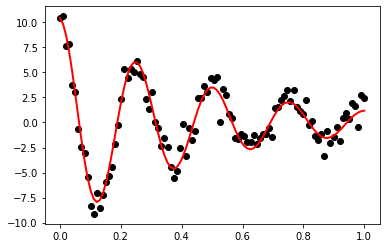

In [26]:
yfit = f(t,p0,p1,p2)
plt.plot(t,y,'ok')
plt.plot(t,yfit,'r',lw=2)

4.2 Ajuste com curve_fit

In [27]:
#difinir a função f(x) (Lorentziana)
def f(x,x0,A,gamma):
    return A*gamma**2/(gamma**2 + (x-x0)**2)    

In [28]:
#Vamos simular alguns dados
npoints = 100
x = np.linspace(1,20,npoints)
x0, A, gamma = 12,3,5
yexato = f(x,x0,A,gamma)
erro_y = np.ones(npoints)*0.7
ydata = yexato + np.random.randn(npoints)*erro_y

In [29]:
#Ajuste com os erros
p0 = [10,4,2]
params, pcov = curve_fit(f,x,ydata,p0, sigma=erro_y, absolute_sigma=True,check_finite=True)
print(params)
print(pcov)

[11.34600454  2.81651403  5.70730686]
[[ 0.09260284 -0.00092571  0.00716551]
 [-0.00092571  0.02311663 -0.05742325]
 [ 0.00716551 -0.05742325  0.27682527]]


In [30]:
#Erro nos parametros:
err_par = np.sqrt(np.diag(pcov))
print(err_par)

[0.30430716 0.15204153 0.52614187]


Text(9, 0.1, '$\\gamma$  = 5.71 $\\pm$ 0.53')

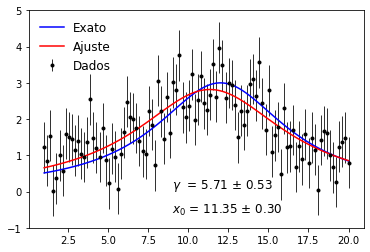

In [31]:
#Comparar os resultados graficamente
yfit = f(x,*params)
plt.errorbar(x,ydata,yerr=erro_y, color = 'k',elinewidth=0.8,lw=0,marker='.',label='Dados')
plt.plot(x,yexato,c='b',label='Exato')
plt.plot(x,yfit,c='r',label='Ajuste')
plt.ylim(-1,5)
plt.legend(frameon=False,loc='upper left',fontsize=12)
info1 = '$x_0$ = {:.2f} $\pm$ {:.2f}'.format(params[0],err_par[0])
info2 = '$\gamma$  = {:.2f} $\pm$ {:.2f}'.format(params[2],err_par[2])
plt.text(9,-0.6,info1,fontsize=12)
plt.text(9,0.1,info2,fontsize=12)